<a href="https://colab.research.google.com/github/donatgithub12/face-detection-cat-and-dog/blob/main/Face_detection_cat%26dogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORTING THE DEPENDENCIES

In [ ]:
import os  # for accessing files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2  # for image prosessing
from google.colab.patches import cv2_imshow
from PIL import Image #PIL -> pillow libary used for image processing libraries
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
 #extracting the compessed Dataset
from zipfile import ZipFile
dataset='/content/drive/MyDrive/catDog.zip'

with ZipFile(dataset,'r') as zip:  # r for reading the file
  zip.extractall()
  print('the dataset is extacted')

the dataset is extacted


In [ ]:
cat_files=os.listdir('/content/Dog and Cat /Cat') # create list contain files with mask
print(cat_files[:5])  # print the first five elements
print(cat_files[-5:]) # print the last five elements of the list

['t66.png', '277.png', '203.png', '38.png', 't28.png']
['107.png', 't15.png', '52.png', '185.png', '250.png']


In [ ]:
dog_files=os.listdir('/content/Dog and Cat /Dog') # create list contain files without mask
print(dog_files[:5])  # print the first five elements
print(dog_files[-5:])  # print the last five elements of the list

['d312.png', 'd132.png', 'd282.png', 'd241.png', 'd137.png']
['d86.png', 'd256.png', 'd290.png', 'd200.png', 'd184.png']


In [ ]:
print('Number of mask images:',len(cat_files))
print('number of without mask images:', len(dog_files))

Number of mask images: 500
number of without mask images: 500


In [ ]:
len(cat_files)

500

In [ ]:
len(dog_files)

500

Creating lables for the two class of images

with masks-> 0


withoutmask -> 1


In [ ]:
#creating the labels
cat_labels = [0]*500
dog_labels = [1]*500

In [ ]:
print(cat_labels[:5])
print(dog_labels[:5])

[0, 0, 0, 0, 0]
[1, 1, 1, 1, 1]


In [ ]:
print(len(cat_labels))
print(len(dog_labels))

500
500


In [ ]:
labels = cat_labels + dog_labels # adding the to list

print(len(labels))
print(labels[0:5])
print(labels[-5:])

1000
[0, 0, 0, 0, 0]
[1, 1, 1, 1, 1]


Displaying the images


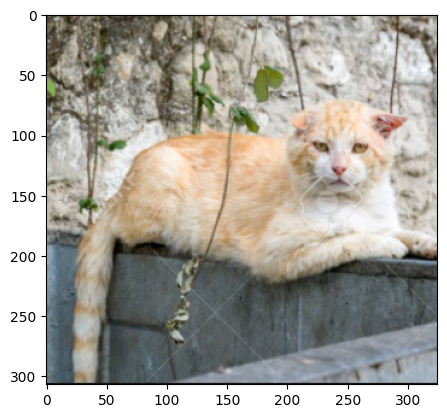

In [ ]:
# dispolaying with mask image
img=mpimg.imread('/content/Dog and Cat /Cat/100.png') # read the image into numpy array
imgplot = plt.imshow(img)
plt.show()

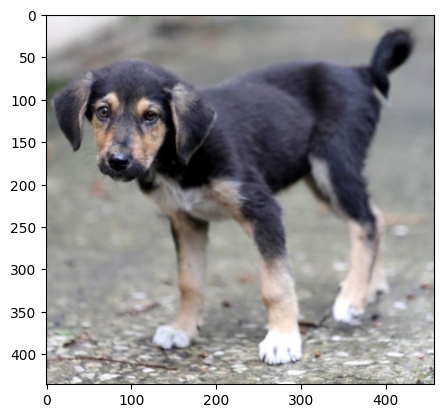

In [ ]:
#displaying without mask image
img = mpimg.imread('/content/Dog and Cat /Dog/d10.png')
imgplot = plt.imshow(img)
plt.show()

Image Processing

Resize the images

image processing

1.Resize the images


2.Convert the images to numpy arrays

In [ ]:
#convert images to numpy arrays
cat_path = '/content/Dog and Cat /Cat/' # don't forgot to add /
data = [] # create a empty list


for img_file in os.listdir(cat_path): #Iterate over files in the "cat_path" directory
    img_path = os.path.join(cat_path, img_file)
    if os.path.isfile(img_path): # check if "img_path" is a file
       image = Image.open(cat_path + img_file)  # open the all file example  /content/data/with_mask/with_mask_894.jpg
       image = image.resize((128,128)) #convert all the images  dimensions to 128 x 128
       image = image.convert('RGB')    # converting all the images to RGB
       image = np.array(image)         # converting to numpy array
       data.append(image)              # adding image to data


In [ ]:
dog_path = '/content/Dog and Cat /Dog/'
for img_file in os.listdir(dog_path): #Iterate over files in the "cat_path" directory
    img_path = os.path.join(dog_path ,img_file)
    if os.path.isfile(img_path): # check if "img_path" is a file
       image = Image.open(dog_path + img_file)  # open the all file example  /content/data/with_mask/with_mask_894.jpg
       image = image.resize((128,128)) #convert all the images  dimensions to 128 x 128
       image = image.convert('RGB')    # converting all the images to RGB
       image = np.array(image)         # converting to numpy array
       data.append(image)              # adding image to data


array([[[162, 183, 202],
        [163, 185, 205],
        [165, 187, 207],
        ...,
        [161, 173, 167],
        [157, 170, 162],
        [153, 166, 157]],

       [[162, 184, 202],
        [164, 186, 205],
        [165, 189, 208],
        ...,
        [161, 174, 166],
        [157, 170, 161],
        [154, 167, 158]],

       [[162, 184, 202],
        [165, 188, 206],
        [166, 190, 209],
        ...,
        [161, 173, 165],
        [158, 170, 161],
        [156, 168, 159]],

       ...,

       [[222, 211, 165],
        [215, 203, 157],
        [209, 198, 152],
        ...,
        [ 67,  52,  30],
        [ 53,  38,  14],
        [ 58,  42,  17]],

       [[129, 124,  98],
        [125, 120,  94],
        [122, 117,  91],
        ...,
        [ 37,  29,  19],
        [ 39,  30,  18],
        [ 44,  36,  23]],

       [[ 11,  13,  18],
        [ 11,  13,  18],
        [ 12,  13,  18],
        ...,
        [ 18,  20,  24],
        [ 19,  20,  24],
        [ 18,  20,  24]]], dtype=uint8)
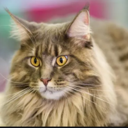

In [ ]:
data[0]

In [ ]:
len(data)

1000

In [ ]:
type(data[0])

numpy.ndarray

In [ ]:
data[0].shape

(128, 128, 3)

In [ ]:
#converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [ ]:
type(X)

numpy.ndarray

In [ ]:
type(Y)

numpy.ndarray

In [ ]:
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

Train test Split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2, random_state=2)

In [ ]:
print(X.shape, x_train.shape, x_test.shape)

(1000, 128, 128, 3) (800, 128, 128, 3) (200, 128, 128, 3)


In [ ]:
#scaling the data

x_train_scaled =  x_train/255   #to change the value from 0 to 1


x_test_scaled = x_test/255

In [ ]:
x_train_scaled[0]

array([[[0.14901961, 0.12156863, 0.11372549],
        [0.14901961, 0.12156863, 0.11372549],
        [0.15294118, 0.1254902 , 0.11764706],
        ...,
        [0.37647059, 0.34509804, 0.26666667],
        [0.05098039, 0.07058824, 0.01960784],
        [0.06666667, 0.0627451 , 0.00784314]],

       [[0.14117647, 0.1254902 , 0.11372549],
        [0.14117647, 0.1254902 , 0.11372549],
        [0.14509804, 0.12941176, 0.11764706],
        ...,
        [0.11372549, 0.08235294, 0.03529412],
        [0.03137255, 0.04313725, 0.02352941],
        [0.0627451 , 0.05490196, 0.01568627]],

       [[0.14117647, 0.13333333, 0.11764706],
        [0.1372549 , 0.13333333, 0.11764706],
        [0.1372549 , 0.12941176, 0.11764706],
        ...,
        [0.06666667, 0.02352941, 0.00392157],
        [0.02745098, 0.02352941, 0.03137255],
        [0.04705882, 0.03137255, 0.01568627]],

       ...,

       [[0.1372549 , 0.11764706, 0.10588235],
        [0.1372549 , 0.11764706, 0.10588235],
        [0.1372549 , 0

Building a convolutional Netural Networks (CNN)

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
num_of_classes = 2
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation ='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

In [ ]:
#compile the nerual network
model.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['acc'])

In [ ]:
#training the neural network
history = model.fit(x_train_scaled,y_train, validation_split=0.1, epochs=5)

Epoch 1/5
23/23 [==============================] - 20s 809ms/step - loss: 1.1311 - acc: 0.5097 - val_loss: 0.6938 - val_acc: 0.5000
Epoch 2/5
23/23 [==============================] - 22s 954ms/step - loss: 0.6866 - acc: 0.5403 - val_loss: 0.6795 - val_acc: 0.6500
Epoch 3/5
23/23 [==============================] - 18s 770ms/step - loss: 0.6547 - acc: 0.6458 - val_loss: 0.6568 - val_acc: 0.5750
Epoch 4/5
23/23 [==============================] - 19s 814ms/step - loss: 0.6004 - acc: 0.6819 - val_loss: 0.6383 - val_acc: 0.6375
Epoch 5/5
23/23 [==============================] - 19s 822ms/step - loss: 0.5012 - acc: 0.7764 - val_loss: 0.5997 - val_acc: 0.6875


model evaluation

In [ ]:
loss,accuracy = model.evaluate(x_test_scaled,y_test)
print('Test Accuracy= ', accuracy)

7/7 [==============================] - 1s 171ms/step - loss: 0.6718 - acc: 0.6150
Test Accuracy=  0.6150000095367432


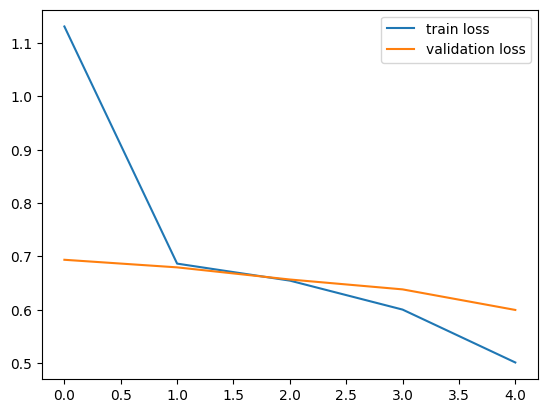

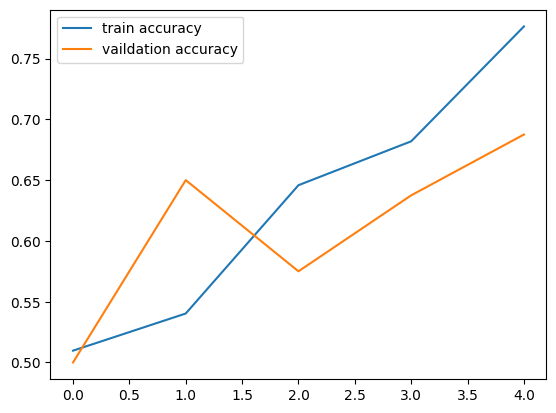

In [ ]:
h = history

#plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

#plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='vaildation accuracy')
plt.legend()
plt.show()

predictive System

path of the image to be pedicted: /content/Dog and Cat /Dog/d1.png


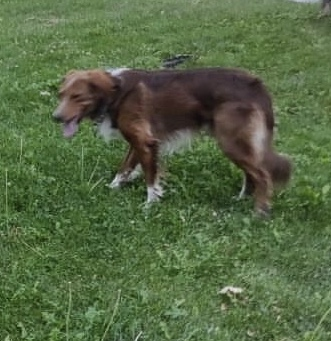

1/1 [==============================] - 0s 31ms/step
[[0.17510077 0.38996094]]
1
Dog


In [ ]:
# @title Default title text
input_image_path = input('path of the image to be pedicted: ')
input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled,[1,128,128,3])

input_prediction=model.predict(input_image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 1:
  print('Dog')

else:
  print('Cat')